<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.The column names include id, imdb_id, popularity, budge,t revenue, original_title, cas,t homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj and revenue_adj. The columns can be used to identify trends in the consumption of movies in regards to the entertainment industry.This information when analysed (e.g revenue and popularity) could be used to drive up profit margins or identify the most important variables to considered while making films ensuring effectivenes and efficiency in their production.


### Question(s) for Analysis
>Question 1 Which movies are the most popular? <br>
>Question 2  Which movies have the highest profit?<br>
>Question 3 Which movies have the highest movie releases?<br>
>Question 4 Is there a correlation between vote_count and profit?


> Firstly loading in the data, using (read_csv) function in csv format('tmdb-movies.csv'), thereafter checking for cleanliness, and preping the dataset for analysis.

In [54]:
#  Import statements for the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#load the dataset into a dataframe
movie = pd.read_csv('tmdb-movies.csv')


In [55]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0b

  Could not find a version that satisfies the requirement pandas==0.25.0b (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5)
No matching distribution found for pandas==0.25.0b


<a id='wrangling'></a>
## Data Wrangling


>Checking data at a glance for problems that might affect qulity of the analysis.

In [56]:
#Inspecting types and look for instances of missing or possibly errant data.
movie.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [57]:
#Check  data  in the columns.
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [58]:
movie.shape

(10866, 21)

In [59]:
#Checking for null values
movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> The data is consists of 10866 enties or movies and 21 collumns between (float, int and object/string),some data values are null and need to droped. There are some columns we have no need of as they dont affect our calculations such is ['homepage', 'overview', 'runtime', 'tagline', 'keywords' and 'production_companies'], so will drop them from the dataframe.

In [60]:
# Looking for duplicates in the data for movies
movie[movie.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [61]:
# Removing the duplicated data
movie.drop_duplicates(inplace=True)


### Data Cleaning

 

>Removing unusable columns, null values and duplicates from the entries provided

In [62]:
# Droping unwanted data
movie.drop(['homepage', 'overview', 'runtime', 'tagline','production_companies','keywords'], axis=1, inplace=True)
movie.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [63]:
# Finding null values
movie.isnull().sum()


id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [64]:
# Dropping rows with null values to make work easier
movie.dropna(inplace=True)
movie.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [65]:
# Check prepared data
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10726 entries, 0 to 10865
Data columns (total 15 columns):
id                10726 non-null int64
imdb_id           10726 non-null object
popularity        10726 non-null float64
budget            10726 non-null int64
revenue           10726 non-null int64
original_title    10726 non-null object
cast              10726 non-null object
director          10726 non-null object
genres            10726 non-null object
release_date      10726 non-null object
vote_count        10726 non-null int64
vote_average      10726 non-null float64
release_year      10726 non-null int64
budget_adj        10726 non-null float64
revenue_adj       10726 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which movie is the most popular?)

> Creating a visualization depicting popular movies to easily communicate findings.

In [66]:
# Plotting function
def label(x, y, t):
    plt.title(x)
    plt.ylabel(y)
    plt.xlabel(t)

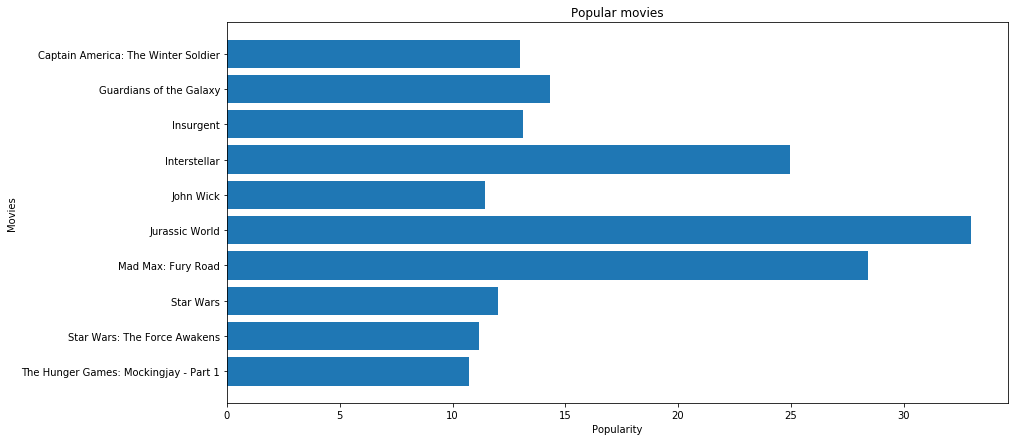

In [67]:
# Plotting popular movies.
movie = movie.sort_values(by='popularity', ascending=False)
title = movie.original_title[:10]
plt.subplots(figsize=(14,7))
plt.gca().invert_yaxis()
label('Popular movies', 'Movies', 'Popularity' )
plt.barh(title, movie['popularity'].head(10));

### Answer 1 - We can conclude that the most popular movie is Jurassic World then Mad Max, interstellar and the least popular is The hunger games.

### Research Question 2 (Which movies have the highest profit?)

> Calculation profit and plotting it against the coresponding movies

In [68]:

#  Replace the 0s values with the mean.
movie['budget'].replace(0,movie['budget'].mean(), inplace=True)


In [69]:
# profit = revenue - budget
movie['profit'] = movie['revenue'] - movie['budget']


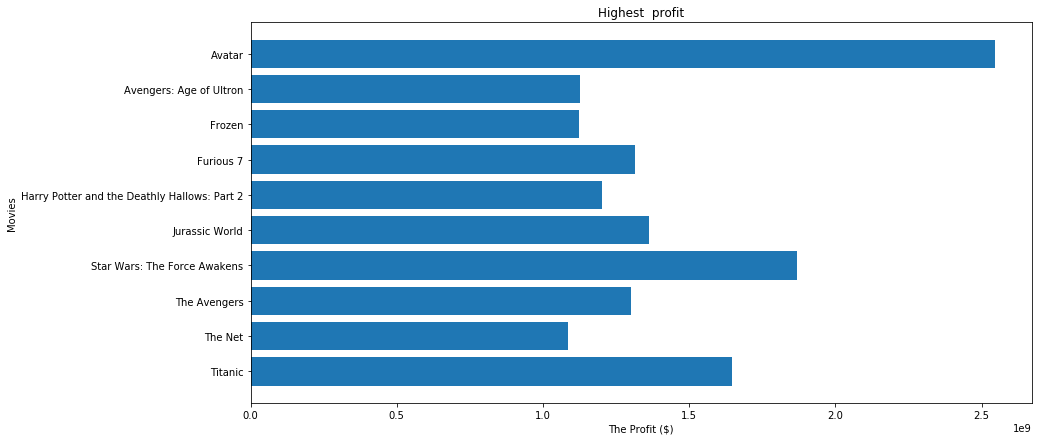

In [70]:
movie = movie.sort_values(by='profit', ascending=False)

plt.subplots(figsize=(14,7))
plt.gca().invert_yaxis()
label('Highest  profit', 'Movies', "The Profit ($)")
plt.barh(movie.original_title.head(10), movie.profit.head(10));


### Answer 2 Avatar, Star wars and Titanic had the highest profit


### Research Question 3 (Which movies have the highest movie releases?)

> Drawing a pie chart to veiw percentages of movie genere releases from total movies.

In [71]:
# Making a dictionary with all unique values on column and count of every value.
def values_to_dictionary(name):
    for value in name.split("|"):
        genres_dic[value] =genres_dic.get(value, 0)+ 1

In [72]:
# extract geners to genres_dic with counts of every genre
genres_dic = {}
movie.genres.apply(lambda x : values_to_dictionary(x))
genres_dic

{'Action': 2371,
 'Adventure': 1463,
 'Fantasy': 905,
 'Science Fiction': 1217,
 'Drama': 4744,
 'Romance': 1708,
 'Thriller': 2902,
 'Crime': 1353,
 'Family': 1213,
 'Animation': 662,
 'Mystery': 808,
 'Comedy': 3775,
 'War': 268,
 'Horror': 1636,
 'History': 330,
 'Western': 164,
 'Music': 399,
 'Documentary': 470,
 'Foreign': 184,
 'TV Movie': 162}

In [73]:
# make a Series from genres_dic
genres_count = pd.Series(genres_dic).sort_values()
genres_count

TV Movie            162
Western             164
Foreign             184
War                 268
History             330
Music               399
Documentary         470
Animation           662
Mystery             808
Fantasy             905
Family             1213
Science Fiction    1217
Crime              1353
Adventure          1463
Horror             1636
Romance            1708
Action             2371
Thriller           2902
Comedy             3775
Drama              4744
dtype: int64

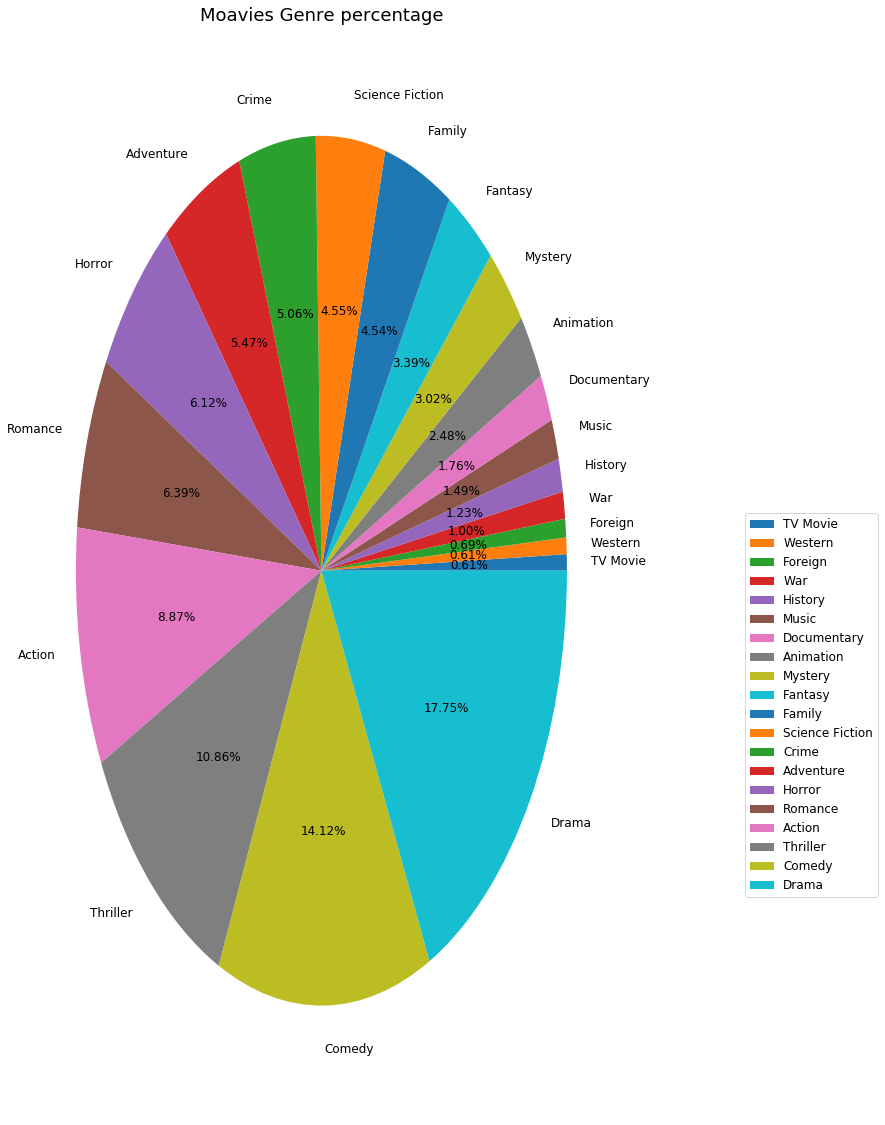

In [74]:
genres_count.plot(kind="pie",
                  autopct = "%.2f%%",
                  fontsize = 12,
                  
                  figsize=(11,20),)
plt.rcParams['font.size'] = 10;
plt.ylabel("")
plt.title("Moavies Genre percentage", fontsize=18, color="k");
plt.legend(genres_count.index,fontsize=12,loc=(1.19,0.2));

### Answer 3 - Drama genre has the highest movies release with 17.75% and Comedy genre in second place with 14.12%.


### Research Question 4 (Is there a correlation between vote_count and profit?)


> Drawing a scatter plot depicting relatioship between votes and profit made

Text(0.5,1,'Corelation btn votes & profit')

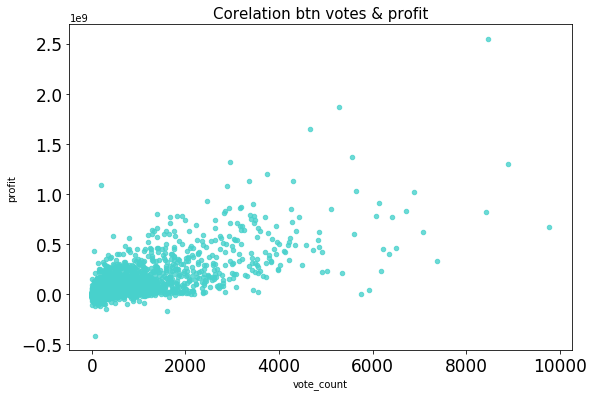

In [52]:
# Scatter plot between vote_count and profit 

movie.plot(kind="scatter",
                  rot = 0,
                  x = 'vote_count',
                  y = 'profit',
                  color=["mediumturquoise"],
                  alpha = 0.8,
                  fontsize = 17,
                  figsize=(9,6),
                  );
plt.title("Corelation btn votes & profit",fontsize=15)

### Answer 4 -  There is a strong positive correlation between vote numbers and profit.

<a id='conclusions'></a>
## Conclusions

>1. The most popular movie is Jurassic World then Mad Max, interstellar and the least popular is The hunger games.<br>
>2. Avatar, Star wars and Titanic had the highest profit.<br>
>3. Drama genre has the highest movies release with 17.75% and Comedy genre in second place with 14.12%.<br>
>4. There is a strong positive correlation between vote numbers and profit.

### Additional Information
Information on the age group that watches the movies could be used to find out if the taste in movies changes with age and how best to make movies that are timeless or make future plans to make movies to suite the aging demographic.

### Limitations
The budget collum had unclean data that needed fixing for proper analysis of the dataset. The fix could impact accuracy of the analysis.Also droping null values could affect analysis of the data.


### Findings
The most popular movie is "Jurassic World"
The highest movie profit is "Avatar" 
The genre with most releases is Drame
The number of votes corelates to amount of profit

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0